In [1]:
import pandas as pd
import numpy as np
import math

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flc = '/Users/pinqingkan/Desktop/Codes/Course_ISLR/data/'
fname = flc + 'Carseats.csv'
X = pd.read_csv(fname)
Nrow, Ncol = X.shape

In [3]:
# encode qualitative variables
US2 = pd.get_dummies(X.US)
fcols2 = []
for i in US2.columns:
    fcols2.append('US_' + i)
US2.columns = fcols2
Urban2 = pd.get_dummies(X.Urban)
fcols2 = []
for i in Urban2.columns:
    fcols2.append('Urban_' + i)
Urban2.columns = fcols2

10 - (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [4]:
xx = pd.concat([X.Price, Urban2.iloc[:, :-1], US2.iloc[:, :-1]], axis = 1)
xx = sm.add_constant(xx) # OLS does not include intercept by default
yy = X.Sales.copy()
results = sm.OLS(yy, xx).fit()

In [5]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 12 Aug 2018   Prob (F-statistic):           2.39e-23
Time:                        17:50:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2221      0.639     22.253      0.0

10 - (c) Write out the model in equation form.  
Since the p value of urban_No is very large, indicating whether Urban = Yes / No doesn't have a relationship with Sales, the model is rerun with the other 2 parameters:  
`Sales = 14.2304 - 0.0545 * Price - 1.1996 * US_No`  
If US = No other than Yes, the Sales decrease with a ratio of 1.1996  
10 - (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [6]:
xx = pd.concat([X.Price, US2.iloc[:, :-1]], axis = 1)
xx = sm.add_constant(xx) # OLS does not include intercept by default
yy = X.Sales.copy()
results = sm.OLS(yy, xx).fit()

In [7]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 12 Aug 2018   Prob (F-statistic):           2.66e-24
Time:                        17:50:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2304      0.630     22.589      0.0

10 - (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [8]:
results.conf_int(alpha = 0.05, cols = None)

,0,1
const,12.991925,15.468946
Price,-0.064760,-0.044195
US_No,-1.707766,-0.691520


10 - (h) Is there evidence of outliers or high leverage observations in the model from (e)?

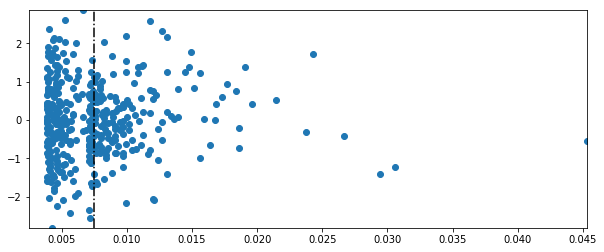

In [9]:
infl = results.get_influence()
resd_std = infl.resid_studentized_internal
hatDiag  = infl.hat_diag_factor
hi0 = (2 + 1) / Nrow # p = 2, n = Nrow
plt.figure(figsize = (10, 4))
plt.scatter(hatDiag, resd_std)
plt.plot([1/Nrow, max(hatDiag)], [-3, -3], '--k')
plt.plot([1/Nrow, max(hatDiag)], [3, 3], '--k')
plt.plot([hi0, hi0], [min(resd_std), max(resd_std)], '-.k')
ax = plt.axis([1/Nrow, max(hatDiag), min(resd_std), max(resd_std)])